In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [311]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\food delivery\archive (8)\train.csv")
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [313]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


## 1) Data cleaning

In [314]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [315]:
#droping unnecessary columns from data like id 
data.drop('ID',axis=1,inplace=True)

In [316]:
# cleaning the target column of time_taken(mins)
l=[]
for i in range(len(data)):
    a=data['Time_taken(min)'][i]
    b=a.split()[1]
    l.append(int(b))
data['Time_taken(min)']=l

In [317]:
# weather condition cleaning
l=[]
for i in range(len(data)):
    a=data['Weatherconditions'][i]
    b=a.split()[1]
    l.append(b)
data['Weatherconditions']=l

In [318]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45593 non-null  object 
 1   Delivery_person_Age          45593 non-null  object 
 2   Delivery_person_Ratings      45593 non-null  object 
 3   Restaurant_latitude          45593 non-null  float64
 4   Restaurant_longitude         45593 non-null  float64
 5   Delivery_location_latitude   45593 non-null  float64
 6   Delivery_location_longitude  45593 non-null  float64
 7   Order_Date                   45593 non-null  object 
 8   Time_Orderd                  45593 non-null  object 
 9   Time_Order_picked            45593 non-null  object 
 10  Weatherconditions            45593 non-null  object 
 11  Road_traffic_density         45593 non-null  object 
 12  Vehicle_condition            45593 non-null  int64  
 13  Type_of_order   

In [320]:
l=['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries']
for i in l:
    data[i]=data[i].astype('float')

In [321]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [322]:
data.Delivery_person_Age.describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

## 2) Univariate analysis

In [323]:
num_col=data.select_dtypes(include=np.number).columns
cat_col=data.select_dtypes(include=np.object).columns

In [324]:
print(num_col,cat_col)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)'],
      dtype='object') Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


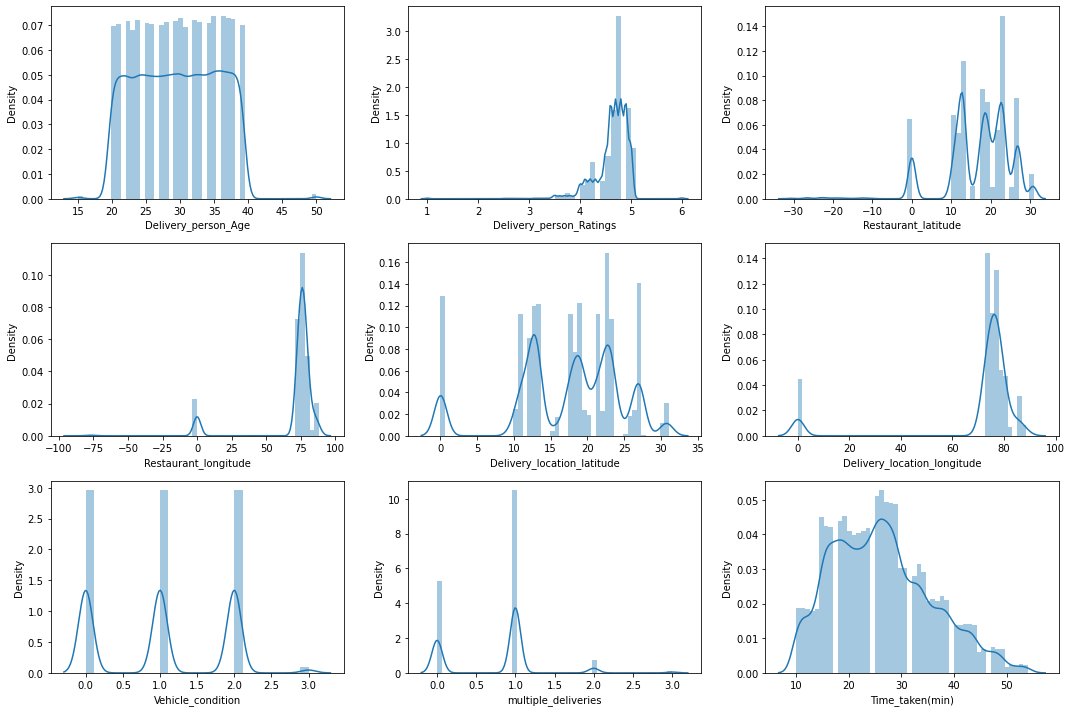

In [325]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(3,3,t)
    sns.distplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [326]:
data.multiple_deliveries.value_counts()

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

insights from univariate analysis
* delivery person age is uniformly distributed between 20 to 40 years
* most of delivery person lies above 4 but an anomoly can be seen in chart having rating above 5.
* by looking the range of delivery location latitude,longitude it seems like location is of india.
* hence one thing can be concluded that resturant coordinates is also of india.
* vehicle condition can be helpful to predict delivery time
* multiple deliveries by delivery agent can also lead to increase in delivery time
* time_taken(target) is positively skewd in nature.

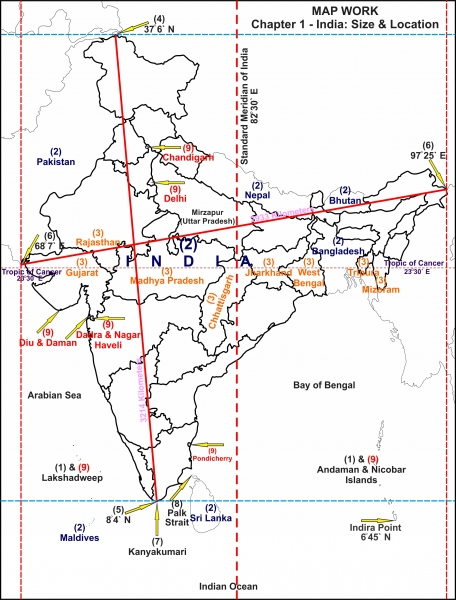

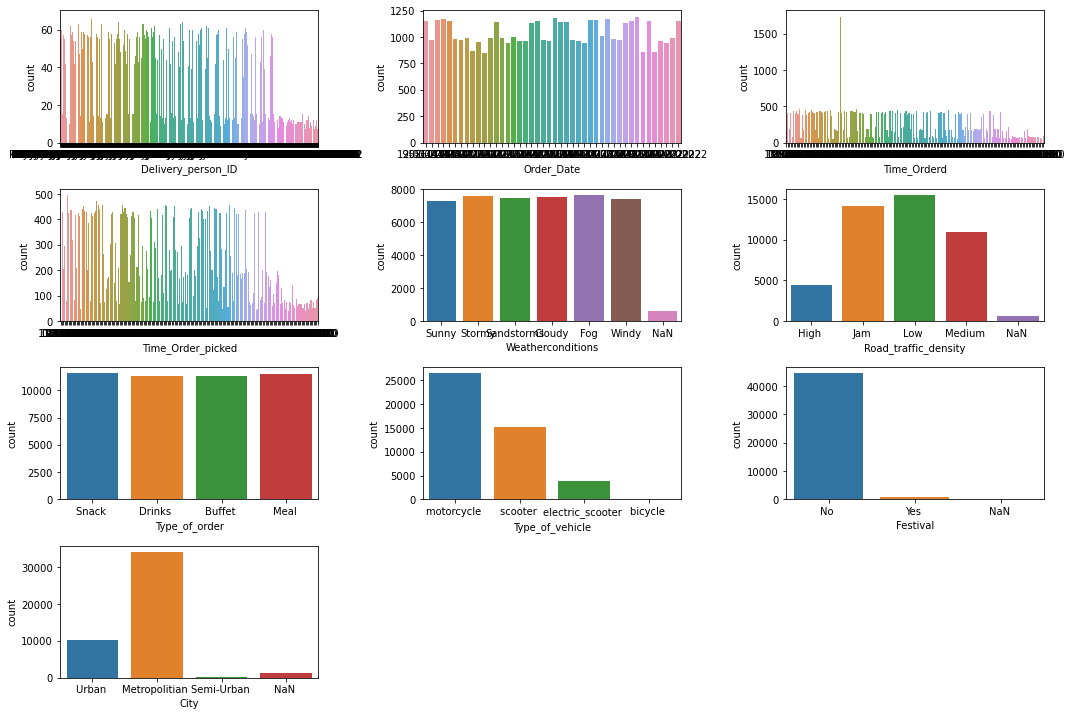

In [327]:
t=1
plt.figure(figsize=(15,10))
for i in cat_col:
    plt.subplot(4,3,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [328]:
data.loc[data['Festival']=='NaN ','Festival']=np.NaN

In [329]:
data.loc[data['City']=='NaN ','City']=np.NaN

In [330]:
data.loc[data.Weatherconditions=='NaN','Weatherconditions']=np.NaN

In [331]:
data.loc[data.Road_traffic_density=='NaN ','Road_traffic_density']=np.NaN

In [332]:
data.loc[data.Time_Orderd=='NaN ','Time_Orderd']=np.NaN

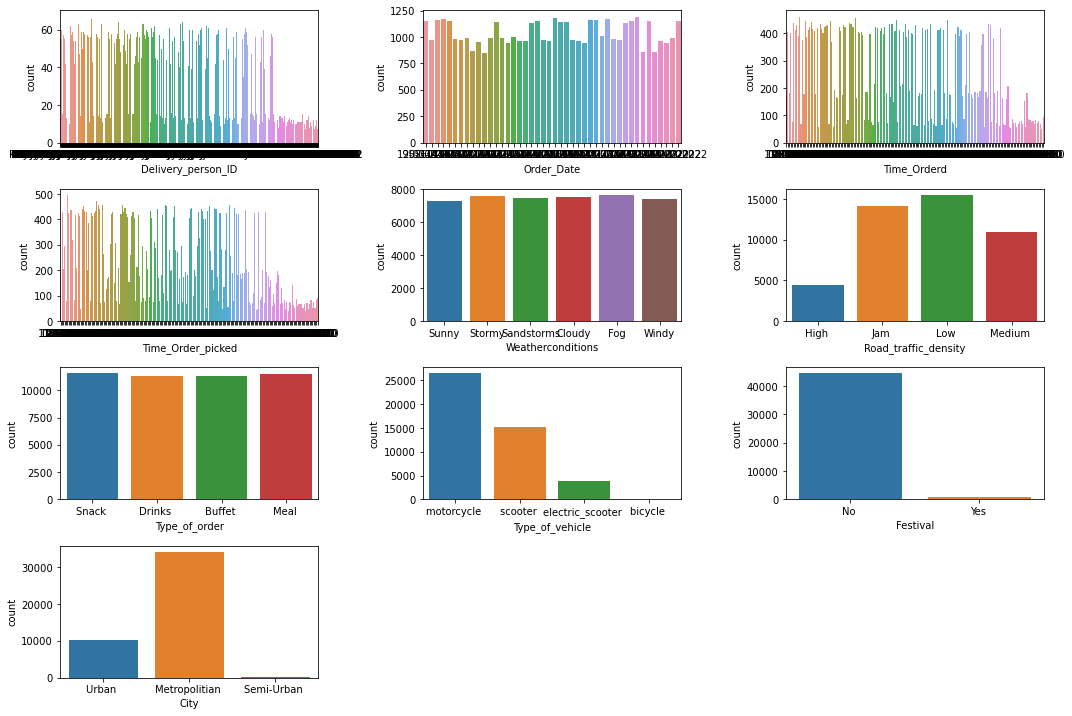

In [333]:
t=1
plt.figure(figsize=(15,10))
for i in cat_col:
    plt.subplot(4,3,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

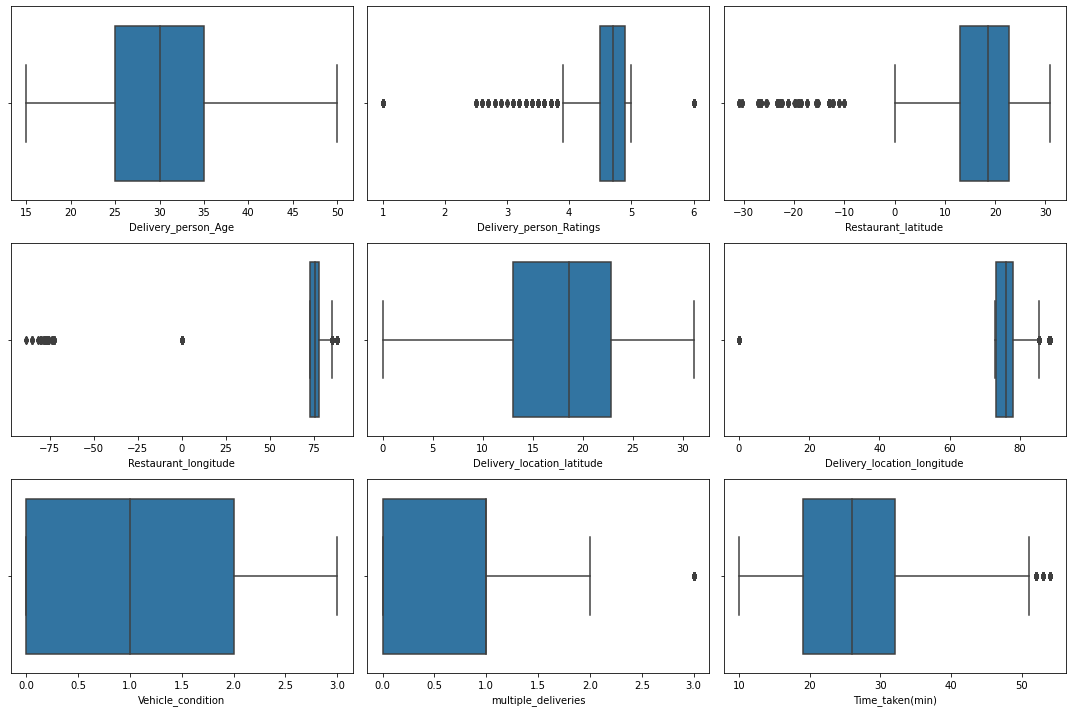

In [334]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(3,3,t)
    sns.boxplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [335]:
data.loc[data.Delivery_person_Ratings>5,'Delivery_person_Ratings']=5

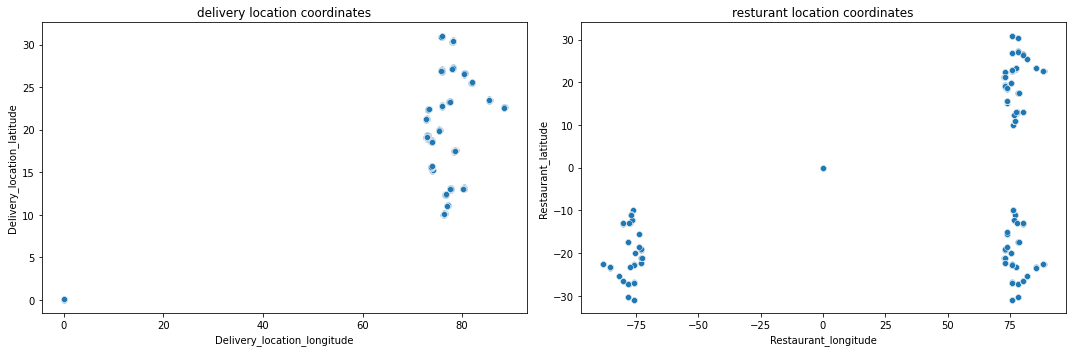

In [336]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data.Delivery_location_longitude,data.Delivery_location_latitude)
plt.title('delivery location coordinates')
plt.subplot(1,2,2)
sns.scatterplot(data.Restaurant_longitude,data.Restaurant_latitude)
plt.title('resturant location coordinates')
plt.tight_layout()
plt.show()

In [337]:
# delivery_location_latitude and longitude are of india so its not possible that location of resturant 
# reside outside india , so we have to correct the coordinate of resturant

In [338]:
data.Restaurant_latitude=np.abs(data.Restaurant_latitude)

In [339]:
data.Restaurant_longitude=np.abs(data.Restaurant_longitude)

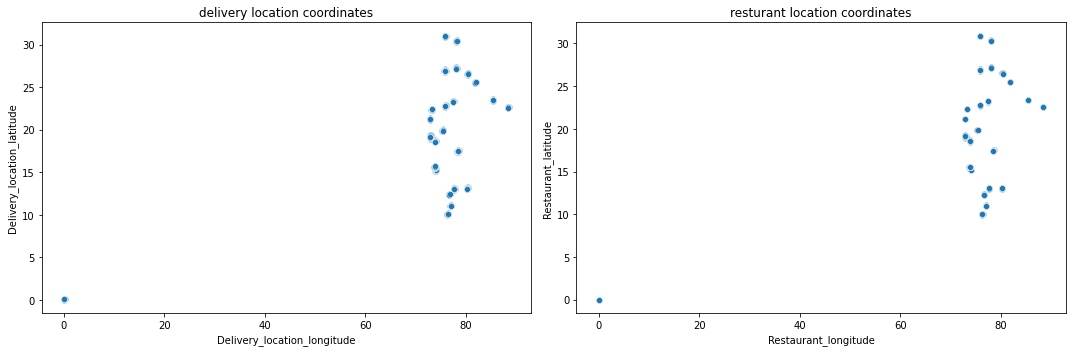

In [340]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data.Delivery_location_longitude,data.Delivery_location_latitude)
plt.title('delivery location coordinates')
plt.subplot(1,2,2)
sns.scatterplot(data.Restaurant_longitude,data.Restaurant_latitude)
plt.title('resturant location coordinates')
plt.tight_layout()
plt.show()

In [341]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43739.0,29.567137,5.815155,15.00,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43685.0,4.632567,0.331560,1.00,4.500000,4.700000,4.900000,5.000000
Restaurant_latitude,45593.0,17.401571,7.333766,0.00,12.934179,18.554382,22.732225,30.914057
Restaurant_longitude,45593.0,70.782088,21.118611,0.00,73.170283,75.898497,78.046106,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.01,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.01,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.00,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44600.0,0.744664,0.572473,0.00,0.000000,1.000000,1.000000,3.000000
Time_taken(min),45593.0,26.294607,9.383806,10.00,19.000000,26.000000,32.000000,54.000000


In [342]:
data.loc[data.Delivery_location_latitude<5,['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [343]:
data.loc[data.Delivery_location_latitude<5,['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]=np.NaN

In [344]:
data['Order_Date']=pd.to_datetime(data.Order_Date,format="%d-%m-%Y")

In [345]:
data.loc[data.Time_Orderd=='nan ',:]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


## Missing value Treatment

In [346]:
data.isnull().sum()/len(data)

Delivery_person_ID             0.000000
Delivery_person_Age            0.040664
Delivery_person_Ratings        0.041849
Restaurant_latitude            0.079837
Restaurant_longitude           0.079837
Delivery_location_latitude     0.079837
Delivery_location_longitude    0.079837
Order_Date                     0.000000
Time_Orderd                    0.037966
Time_Order_picked              0.000000
Weatherconditions              0.013511
Road_traffic_density           0.013182
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.021780
Festival                       0.005001
City                           0.026320
Time_taken(min)                0.000000
dtype: float64

In [347]:
l1=['Delivery_person_Ratings','Delivery_person_Age',]
l2=['Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City','Time_Orderd']

In [348]:
for i in l1:
    data.loc[data[i].isnull(),i]=data[i].median()

In [349]:
for i in l2:
    data.loc[data[i].isnull(),i]=data[i].mode()[0]

In [350]:
data.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude            3640
Restaurant_longitude           3640
Delivery_location_latitude     3640
Delivery_location_longitude    3640
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [351]:
l3=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for i in l3:
    data.loc[data[i].isnull(),i]=data[i].mode()[0]

In [352]:
data.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Feature enginnering

### City name

In [353]:
l=[]
for i in data.Delivery_person_ID:
    l.append(i.split('RES')[0])

In [354]:
l

['INDO',
 'BANG',
 'BANG',
 'COIMB',
 'CHEN',
 'HYD',
 'RANCHI',
 'MYS',
 'HYD',
 'DEH',
 'KOC',
 'PUNE',
 'LUDH',
 'KNP',
 'MUM',
 'MYS',
 'PUNE',
 'HYD',
 'KOL',
 'PUNE',
 'RANCHI',
 'COIMB',
 'CHEN',
 'MUM',
 'CHEN',
 'JAP',
 'SUR',
 'BANG',
 'PUNE',
 'COIMB',
 'SUR',
 'GOA',
 'GOA',
 'RANCHI',
 'PUNE',
 'PUNE',
 'PUNE',
 'SUR',
 'HYD',
 'BANG',
 'BANG',
 'CHEN',
 'MUM',
 'SUR',
 'MUM',
 'KOL',
 'MUM',
 'BANG',
 'CHEN',
 'SUR',
 'RANCHI',
 'BANG',
 'AURG',
 'COIMB',
 'SUR',
 'COIMB',
 'AGR',
 'VAD',
 'JAP',
 'VAD',
 'JAP',
 'MYS',
 'SUR',
 'MUM',
 'PUNE',
 'ALH',
 'DEH',
 'VAD',
 'VAD',
 'CHEN',
 'SUR',
 'SUR',
 'VAD',
 'MYS',
 'BANG',
 'HYD',
 'BHP',
 'CHEN',
 'BANG',
 'VAD',
 'BANG',
 'DEH',
 'CHEN',
 'MUM',
 'JAP',
 'HYD',
 'PUNE',
 'GOA',
 'AURG',
 'BANG',
 'HYD',
 'RANCHI',
 'AGR',
 'INDO',
 'JAP',
 'SUR',
 'MYS',
 'MUM',
 'COIMB',
 'MYS',
 'PUNE',
 'HYD',
 'MUM',
 'COIMB',
 'INDO',
 'BANG',
 'MUM',
 'MYS',
 'SUR',
 'COIMB',
 'SUR',
 'KNP',
 'SUR',
 'MUM',
 'BANG',
 'RANCHI',
 

In [355]:
data['City_name']=l

In [356]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


### City code

In [357]:
a='INDORES13DEL02'
a.split('RES')

['INDO', '13DEL02']

In [358]:
code=[]
for i in data.Delivery_person_ID:
    code.append(i.split('RES')[1])

In [359]:
l=[]
for i in code:
    index=i.find('D')
    l.append(i[index:].strip())

In [360]:
data['code']=l

In [361]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,DEL02
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,DEL02
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,DEL01
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,DEL01


### prepration time

In [362]:
from datetime import datetime
# total taken for preparation
l=[]

for i in range(len(data)):
    a=datetime.strptime(data.Time_Order_picked[i],"%H:%M:%S")
    b=datetime.strptime(data.Time_Orderd[i],"%H:%M:%S")
    delta=a-b
    sec=delta.total_seconds()
    mins=sec/60
    l.append(int(mins))
data['preparation_time']=l

In [363]:
data.loc[data.preparation_time>data['Time_taken(min)']]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,preparation_time
39,BANGRES17DEL02,26.0,4.9,12.972532,77.608179,12.992532,77.628179,2022-03-28,08:40:00,08:55:00,...,2,Buffet,scooter,0.0,No,Metropolitian,11,BANG,DEL02,15
108,SURRES09DEL02,27.0,4.7,21.175975,72.795503,21.195975,72.815503,2022-03-15,10:55:00,11:10:00,...,2,Snack,scooter,0.0,No,Urban,12,SUR,DEL02,15
140,PUNERES05DEL03,30.0,4.7,18.543626,73.905101,18.573626,73.935101,2022-03-09,21:55:00,23:40:00,...,2,Snack,scooter,0.0,No,Metropolitian,19,PUNE,DEL03,105
199,SURRES09DEL02,29.0,5.0,21.175975,72.795503,21.255975,72.875503,2022-03-27,22:35:00,22:50:00,...,1,Snack,scooter,1.0,No,Urban,11,SUR,DEL02,15
202,RANCHIRES01DEL02,29.0,4.7,23.416792,85.316842,23.436792,85.336842,2022-03-03,10:30:00,10:45:00,...,2,Snack,motorcycle,0.0,No,Metropolitian,11,RANCHI,DEL02,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45492,HYDRES18DEL01,25.0,4.8,17.450851,78.379347,17.460851,78.389347,2022-04-01,09:15:00,09:30:00,...,1,Meal,motorcycle,1.0,No,Metropolitian,13,HYD,DEL01,15
45496,CHENRES09DEL02,37.0,4.9,13.044694,80.261470,13.094694,80.311470,2022-03-26,00:00:00,00:15:00,...,2,Snack,scooter,1.0,No,Metropolitian,12,CHEN,DEL02,15
45556,COIMBRES09DEL03,24.0,4.7,11.008638,76.984311,11.068638,77.044311,2022-03-03,22:50:00,23:05:00,...,2,Buffet,motorcycle,1.0,No,Metropolitian,12,COIMB,DEL03,15
45565,RANCHIRES20DEL01,24.0,4.5,23.399250,85.390464,23.409250,85.400464,2022-04-03,09:15:00,09:30:00,...,1,Meal,motorcycle,0.0,No,Urban,10,RANCHI,DEL01,15


In [364]:
#this indicates thats our target variable time_taken(min) mainly consist of time required for delivery agent to deliver the 
#food and this does not include prepration time. 
# on the logical point of view delivery time doesnt depend on prepration time

In [365]:
data.drop('preparation_time',axis=1,inplace=True)

In [366]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,DEL02
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,DEL02
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,DEL01
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,DEL01


<AxesSubplot:xlabel='Time_taken(min)', ylabel='Density'>

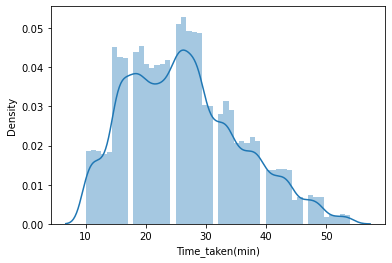

In [367]:
sns.distplot(data['Time_taken(min)'])

In [368]:
# q1=data.time_taken_preparation.quantile(0.25)
# q3=data.time_taken_preparation.quantile(0.75)
# iqr=q3-q1
# ul=q3+1.5*iqr
# ll=q1-1.5*iqr
# data.loc[data.time_taken_preparation<ll,'time_taken_preparation']

### distance diff km

In [369]:
#distance between resturant and delivery location
import geopy.distance
restaurant_cordinates=data[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates=data[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()


In [370]:
restaurant_cordinates

array([[22.745049, 75.892471],
       [12.913041, 77.683237],
       [12.914264, 77.6784  ],
       ...,
       [13.022394, 80.242439],
       [11.001753, 76.986241],
       [23.351058, 85.325731]])

In [371]:
data['distance_diff_KM']=np.zeros(len(data))
for i in range(len(data)):
    data['distance_diff_KM'].loc[i]=geopy.distance.geodesic(restaurant_cordinates[i],delivery_location_cordinates[i]).km

In [372]:
geopy.distance.geodesic(restaurant_cordinates[0],delivery_location_cordinates[0])

Distance(3.020736643461066)

### total delivery count

In [373]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,2,Snack,motorcycle,0.0,No,Urban,24,INDO,DEL02,3.020737
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,DEL02,20.143737
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,DEL01,1.549693
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02,7.774497
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,DEL01,6.197898


In [374]:
# experinced driver
a=data.Delivery_person_ID.value_counts()
data['total_delivery']=data.Delivery_person_ID.map(a)

In [375]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,Snack,motorcycle,0.0,No,Urban,24,INDO,DEL02,3.020737,62
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Snack,scooter,1.0,No,Metropolitian,33,BANG,DEL02,20.143737,56
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Drinks,motorcycle,1.0,No,Urban,26,BANG,DEL01,1.549693,55
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02,7.774497,61
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,Snack,scooter,1.0,No,Metropolitian,30,CHEN,DEL01,6.197898,57


In [376]:
data.rename({'total_delivery':'total_delivery_count'},axis=1,inplace=True)

In [377]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery_count
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,Snack,motorcycle,0.0,No,Urban,24,INDO,DEL02,3.020737,62
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Snack,scooter,1.0,No,Metropolitian,33,BANG,DEL02,20.143737,56
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Drinks,motorcycle,1.0,No,Urban,26,BANG,DEL01,1.549693,55
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02,7.774497,61
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,Snack,scooter,1.0,No,Metropolitian,30,CHEN,DEL01,6.197898,57


 ### Time_Orderd

In [378]:
l=[]
for i in data.Time_Orderd:
    l.append(int(i[:2]))

In [379]:
def func(x):
    if x>12:
        return 'PM'
    else:
        return 'AM'

In [380]:
data['Time_Orderd']=l

In [381]:
data['day_or_night']=data['Time_Orderd'].apply(func)

In [382]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery_count,day_or_night
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11,11:45:00,...,motorcycle,0.0,No,Urban,24,INDO,DEL02,3.020737,62,AM
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19,19:50:00,...,scooter,1.0,No,Metropolitian,33,BANG,DEL02,20.143737,56,PM
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8,08:45:00,...,motorcycle,1.0,No,Urban,26,BANG,DEL01,1.549693,55,AM
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18,18:10:00,...,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02,7.774497,61,PM
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13,13:45:00,...,scooter,1.0,No,Metropolitian,30,CHEN,DEL01,6.197898,57,PM


In [383]:
data.day_or_night.value_counts()

PM    36553
AM     9040
Name: day_or_night, dtype: int64

In [397]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery_count,day_or_night
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11,11:45:00,...,motorcycle,0.0,No,Urban,24,INDO,DEL02,3.020737,62,AM
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19,19:50:00,...,scooter,1.0,No,Metropolitian,33,BANG,DEL02,20.143737,56,PM
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8,08:45:00,...,motorcycle,1.0,No,Urban,26,BANG,DEL01,1.549693,55,AM
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18,18:10:00,...,motorcycle,1.0,No,Metropolitian,21,COIMB,DEL02,7.774497,61,PM
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13,13:45:00,...,scooter,1.0,No,Metropolitian,30,CHEN,DEL01,6.197898,57,PM


## Encoding

In [445]:
data1=data.copy()

In [446]:
scaling_columns=['Delivery_person_Age','Delivery_person_Ratings','distance_diff_KM','total_delivery_count']

In [447]:
data1.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

In [448]:
data1
cat_col=data1.select_dtypes(include=np.object).columns

In [449]:
cat_col

Index(['Delivery_person_ID', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'City_name',
       'code', 'day_or_night'],
      dtype='object')

In [450]:
for i in cat_col:
    print(data1[i].value_counts())

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
Fog           8270
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weatherconditions, dtype: int64
Low        16078
Jam        14143
Medium     10947
High        4425
Name: Road_traffic_density, dtype: int64
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64
No      44697
Yes       896
Name: Festival, dtype: int64
Metropolitian     35293
Urban             10136
Semi-Urban          164
Name: City, dtype: int64
JAP       3443
RANCHI    3229
BANG      3195

In [451]:
### frequency encoding for delivery person id 
encoding=data1.Delivery_person_ID.value_counts()/len(data1)
data1['delivery_person_id']=data1.Delivery_person_ID.map(encoding)

In [452]:
### target encoding for weather conding 
encoding=data1.groupby('Weatherconditions')['Time_taken(min)'].mean()
data1['Weatherconditions']=data1['Weatherconditions'].map(encoding)

In [453]:
### target encoding for Road_traffic_density
encoding=data1.groupby('Road_traffic_density')['Time_taken(min)'].mean()
data1['Road_traffic_density']=data1['Road_traffic_density'].map(encoding)


In [454]:
### target encoding for type of order
encoding=data1.groupby('Type_of_order')['Time_taken(min)'].mean()
data1['Type_of_order']=data1['Type_of_order'].map(encoding)


In [455]:
### frequency encodning for Type_of_vehicle	
encoding=data1.Type_of_vehicle.value_counts()/len(data1)
data1['Type_of_vehicle']=data1.Type_of_vehicle.map(encoding)

In [456]:
### dummies for festival
data1['Festival']=pd.get_dummies(data1.Festival,drop_first=True)

In [457]:
### frequency enconding for City
encoding=data1.City.value_counts()/len(data1)
data1['City']=data1.City.map(encoding)

In [458]:
data1.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery_count,day_or_night,delivery_person_id
0,INDORES13DEL02,37.0,4.9,21.856947,27.240000,2,26.286309,0.579804,0.0,0,0.222315,24,INDO,DEL02,3.020737,62,AM,0.001360
1,BANGRES18DEL02,34.0,4.5,25.870815,31.176624,2,26.286309,0.335051,1.0,0,0.774088,33,BANG,DEL02,20.143737,56,PM,0.001228
2,BANGRES19DEL01,23.0,4.4,25.875517,21.464175,0,26.187953,0.579804,1.0,0,0.222315,26,BANG,DEL01,1.549693,55,AM,0.001206
3,COIMBRES13DEL02,38.0,4.7,21.856947,26.699644,0,26.283511,0.579804,1.0,0,0.774088,21,COIMB,DEL02,7.774497,61,PM,0.001338
4,CHENRES12DEL01,32.0,4.6,28.917330,27.240000,1,26.286309,0.335051,1.0,0,0.774088,30,CHEN,DEL01,6.197898,57,PM,0.001250


In [459]:
### target encoding for city_name
encoding=data1.groupby('City_name')['Time_taken(min)'].mean()
data1['City_name']=data1['City_name'].map(encoding)


In [460]:
### target encoding for code
encoding=data1.groupby('code')['Time_taken(min)'].mean()
data1['code']=data1['code'].map(encoding)


In [461]:
### target encoding for code
encoding=data1.groupby('day_or_night')['Time_taken(min)'].mean()
data1['day_or_night']=data1['day_or_night'].map(encoding)


In [462]:
data1.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery_count,day_or_night,delivery_person_id
0,INDORES13DEL02,37.0,4.9,21.856947,27.240000,2,26.286309,0.579804,0.0,0,0.222315,24,26.116176,26.126699,3.020737,62,21.865708,0.001360
1,BANGRES18DEL02,34.0,4.5,25.870815,31.176624,2,26.286309,0.335051,1.0,0,0.774088,33,26.052895,26.126699,20.143737,56,27.389927,0.001228
2,BANGRES19DEL01,23.0,4.4,25.875517,21.464175,0,26.187953,0.579804,1.0,0,0.222315,26,26.052895,26.732894,1.549693,55,21.865708,0.001206
3,COIMBRES13DEL02,38.0,4.7,21.856947,26.699644,0,26.283511,0.579804,1.0,0,0.774088,21,26.292429,26.126699,7.774497,61,27.389927,0.001338
4,CHENRES12DEL01,32.0,4.6,28.917330,27.240000,1,26.286309,0.335051,1.0,0,0.774088,30,26.358983,26.732894,6.197898,57,27.389927,0.001250


In [463]:
data1.drop('Delivery_person_ID',axis=1,inplace=True)

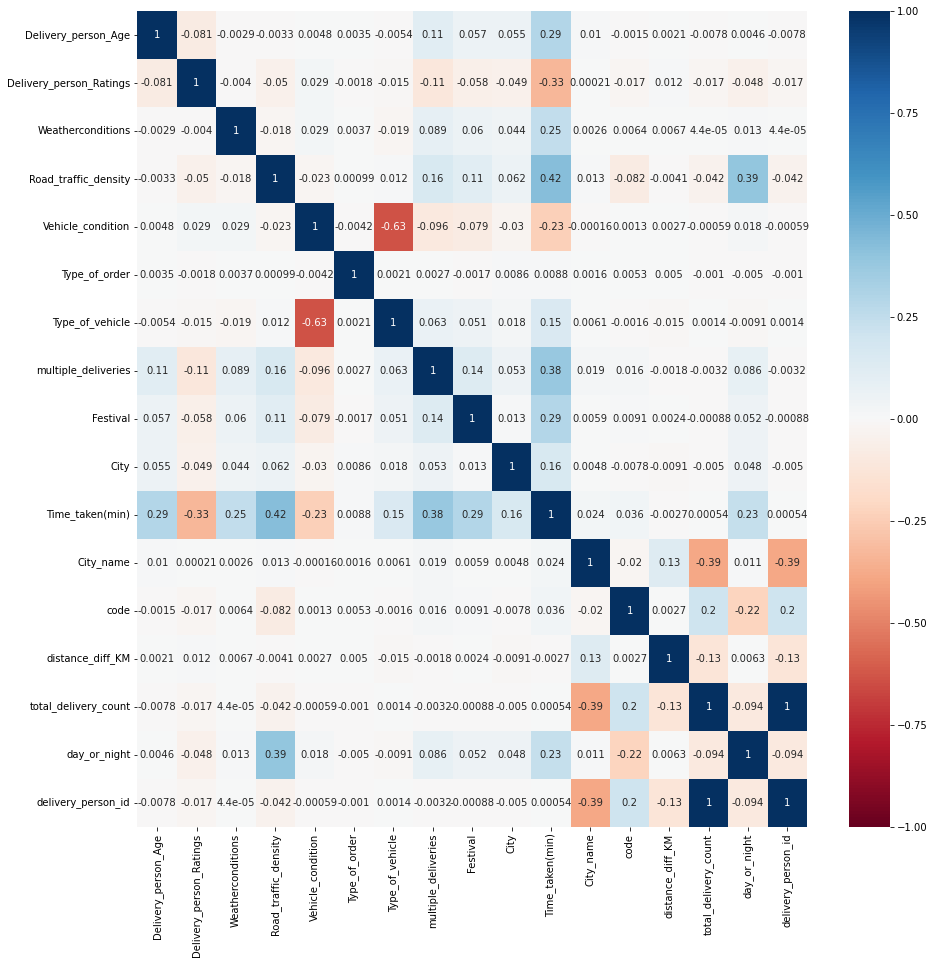

In [464]:
plt.figure(figsize=[15,15])
sns.heatmap(data1.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

In [465]:
data1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_name,code,distance_diff_KM,total_delivery_count,day_or_night,delivery_person_id
0,37.0,4.9,21.856947,27.240000,2,26.286309,0.579804,0.0,0,0.222315,24,26.116176,26.126699,3.020737,62,21.865708,0.001360
1,34.0,4.5,25.870815,31.176624,2,26.286309,0.335051,1.0,0,0.774088,33,26.052895,26.126699,20.143737,56,27.389927,0.001228
2,23.0,4.4,25.875517,21.464175,0,26.187953,0.579804,1.0,0,0.222315,26,26.052895,26.732894,1.549693,55,21.865708,0.001206
3,38.0,4.7,21.856947,26.699644,0,26.283511,0.579804,1.0,0,0.774088,21,26.292429,26.126699,7.774497,61,27.389927,0.001338
4,32.0,4.6,28.917330,27.240000,1,26.286309,0.335051,1.0,0,0.774088,30,26.358983,26.732894,6.197898,57,27.389927,0.001250


In [466]:
data1.drop('total_delivery_count',axis=1,inplace=True)

## Machine Learning model

In [467]:
from sklearn.model_selection import train_test_split

In [468]:
X=data1.drop('Time_taken(min)',axis=1)
y=data1['Time_taken(min)']

In [469]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [470]:
scaling_columns=['Delivery_person_Age',
 'Delivery_person_Ratings',
 'distance_diff_KM',]

In [471]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# for i in scaling_columns:
#     xtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(xtrain.loc[:,i]))
#     xtest.loc[:,i]=ss.fit_transform(pd.DataFrame(xtest.loc[:,i]))


In [472]:
import statsmodels.api as sma
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Base model- linear regression

In [473]:
xtrain=sma.add_constant(xtrain)
xtest=sma.add_constant(xtest)

In [474]:
linear_regression=sma.OLS(ytrain,xtrain).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Time_taken(min)   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2971.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:48:57   Log-Likelihood:            -1.1889e+05
No. Observations:               36474   AIC:                         2.378e+05
Df Residuals:                   36458   BIC:                         2.379e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -88.8857     11.632     -7.641      0.000    -111.686     -66.086
Delivery_person_Age         0.3946      0.006     67.306      0.000       0.383       0.406
Delivery_person_Ratings    -7.2849      0.103    -70.640      0.000      -7.487      -7.083
Weatherconditions           0.9182      0.014     64.395      0.000       0.890       0.946
Road_traffic_density        0.7902      0.009     86.077      0.000       0.772       0.808
Vehicle_condition          -2.1423      0.051    -41.760      0.000      -2.243      -2.042
Type_of_order               0.4247      0.401      1.059      0.290      -0.362       1.211
Type_of_vehicle             0.3176      0.267      1.189      0.234      -0.206       0.841
multiple_deliveries         3.2306      0.061     53.350      0.000       3.112       3.349
Festival                   10.8796      0.244     44.660      0.000      10.402      11.357
City                        3.1784      0.143     22.282      0.000       2.899       3.458
City_name                   0.7170      0.157      4.563      0.000       0.409       1.025
code                        1.9218      0.103     18.697      0.000       1.720       2.123
distance_diff_KM         9.265e-05   6.99e-05      1.326      0.185   -4.44e-05       0.000
day_or_night                0.3348      0.017     20.056      0.000       0.302       0.367
delivery_person_id        321.2217    100.575      3.194      0.001     124.093     518.351
==============================================================================
Omnibus:                      629.643   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.724
Skew:                           0.299   Prob(JB):                    7.58e-150
Kurtosis:                       3.308   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [475]:
def validate(pred,actual):
    print('rmse',mean_squared_error(actual,pred))
    print('r2_square',r2_score(actual,pred))

In [476]:
validate(linear_regression.predict(xtest),ytest)

rmse 39.01809687736401
r2_square 0.5538861169049476


### Decision tree

In [477]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 31.421647110428776
r2_square 0.6407402172962461


### Random forest

In [478]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 16.716475568788
r2_square 0.8088719741740669


### Adaboost

In [479]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 33.69972261156597
r2_square 0.614693813470087


### Xgboost

In [480]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 16.80985350468481
r2_square 0.8078043364133309


In [481]:
## hence random forest works fine on above dataset having r2_square about 80%